1.informations sur PhD_v1
(447644, 18)
                Auteur Identifiant auteur  \
0       Saeed Al marri                NaN   
1    Andrea Ramazzotti          174423705   
2  OLIVIER BODENREIDER                NaN   
3       Emmanuel Porte                NaN   
4     Arthur Devriendt                NaN   

                                               Titre  \
0  Le credit documentaire et l'onopposabilite des...   
1  Application de la PGD a la resolution de probl...   
2  Conception d'un outil informatique d'etude des...   
3  Socio-histoire des politiques publiques en mat...   
4  LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   

                           Directeur de these  \
0                         Philippe Delebecque   
1  Jean-Claude Grandidier,Marianne Beringhier   
2                             Francois Kohler   
3                               Gilles Pollet   
4                               Gabriel Dupuy   

              Directeur de these (nom prenom) Identifiant 

NameError: name 'plt' is not defined

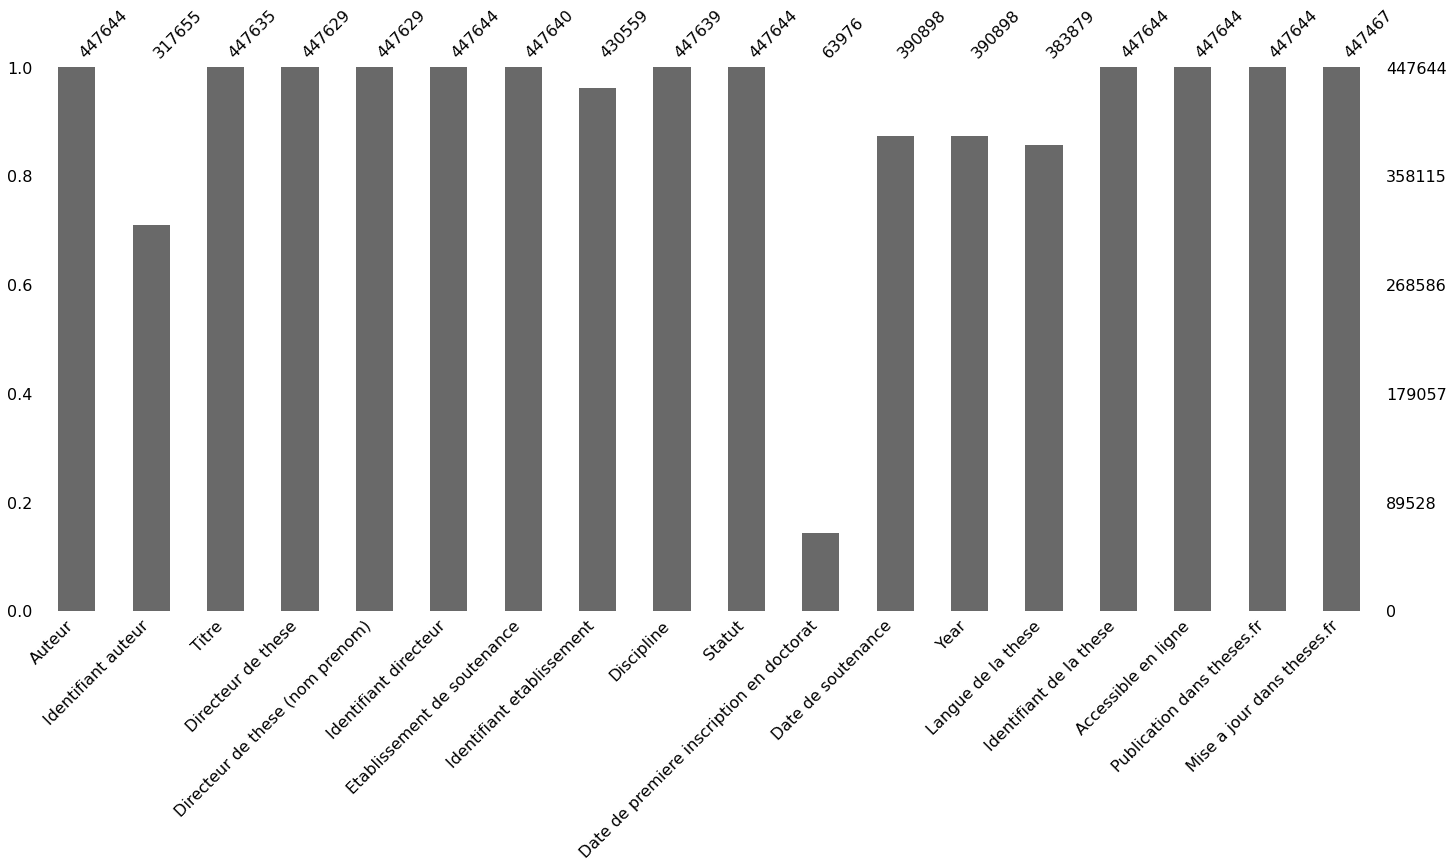

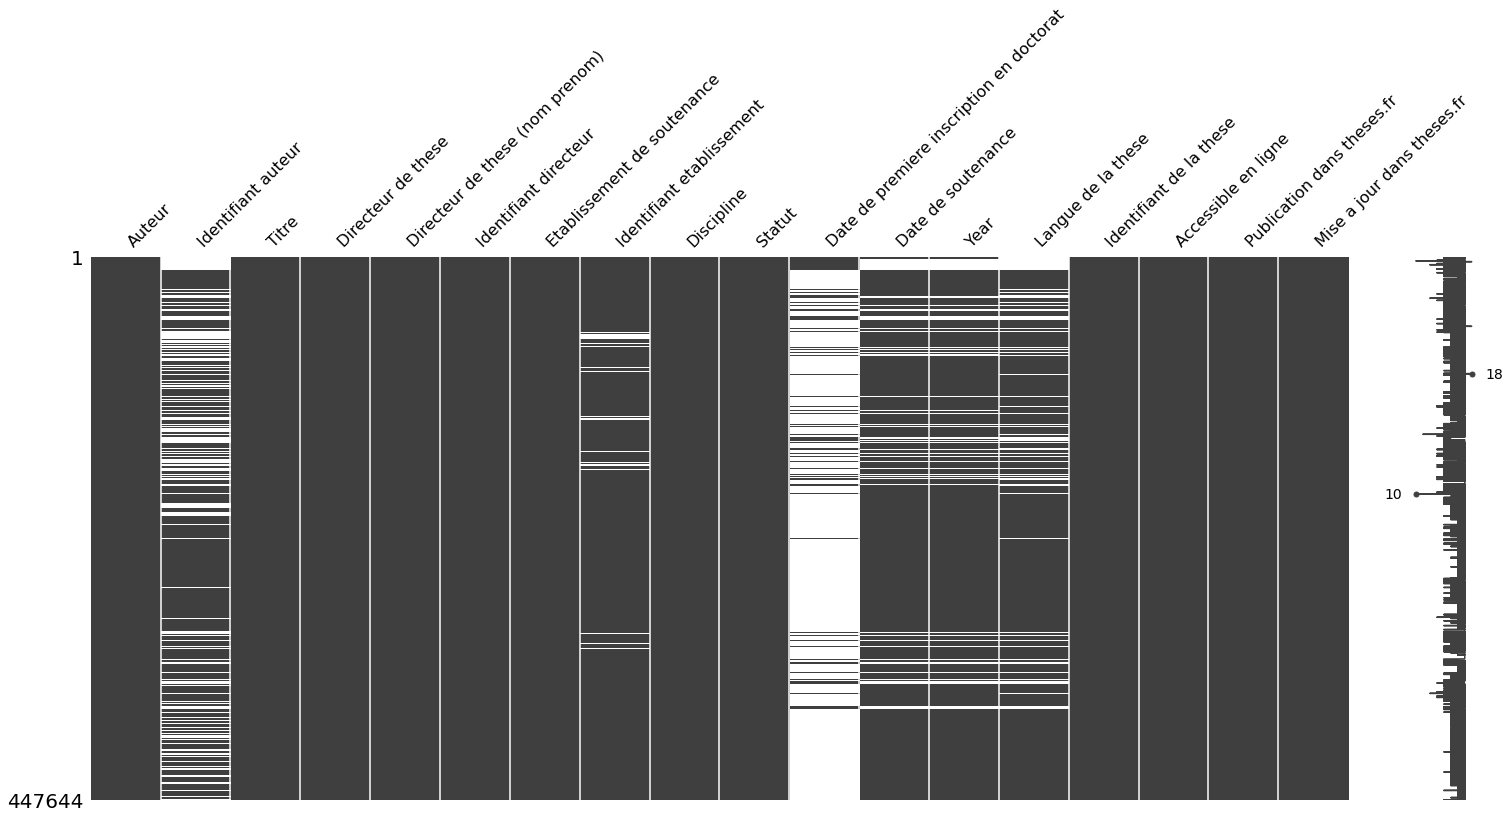

In [1]:
import pandas as pd
import missingno as msno
import numpy as np


datav1=pd.read_csv('PhD_v1.csv', sep=";", on_bad_lines='skip',low_memory=False)
CRED = '\033[91m'
CEND = '\033[0m'
print(CRED +'1.informations sur PhD_v1'+ CEND)
print(datav1.shape)
print( datav1.head())
print( datav1.columns )
print(datav1.dtypes )
print(datav1.info() )

grb='\033[4m'
print(grb + '***********Question 1. pourquoi il importe 18eme colmun(unnamed) qui ne existe pas?**************' + CEND)

data=pd.read_csv('PhD_v2.csv', on_bad_lines='skip',low_memory=False)
print(CRED +'2.informations sur PhD_v2'+ CEND)
print(data.shape)
print(data.info() )

msno.bar(data)
msno.matrix(data)
plt.legend(['missing','not missing'],loc="lower center", bbox_to_anchor=(1, 0.5))


msno.heatmap(data)
msno.dendrogram(data)


date_soutien=data['Date de soutenance']
date_inscription=data['Date de premiere inscription en doctorat']
Statut_these=data['Statut']
date_soutien_nullity=date_soutien.isna()
date_inscription_nullity=date_inscription.isna()
missing_percentage_date_soutien=date_soutien_nullity.mean()*100
missing_percentage_date_inscription=date_inscription_nullity.mean()*100
print ('Missing percentage du date soutien de these   ' + str (   missing_percentage_date_soutien) )
print ('Missing percentage du date inscription de these  ' + str(   missing_percentage_date_inscription ))




In [2]:
year_inscrip=pd.DatetimeIndex(data["Date de premiere inscription en doctorat"]).year
#print(year_inscrip.value_counts())
year_defense=data["Year"]
#print(year_defense.value_counts())

df_year_inscrip = year_inscrip.value_counts().rename_axis('year_inscri').reset_index(name='counts')
df_year_defense = year_defense.value_counts().rename_axis('year_defense').reset_index(name='counts')
print(df_year_inscrip.info())
print(df_year_defense.info())
print('=============')
#df_year=df_year_inscrip.merge(df_year_defense,left_on='year_inscri',right_on='year_defense', suffixes=('_left', '_right'))
#print(df_year)
data1=pd.DataFrame()
data1['Statut']=data['Statut']
data1['Date de premiere inscription en doctorat']=data['Date de premiere inscription en doctorat']
print(data1.head(10))
selected_rows = data1[~data1['Date de premiere inscription en doctorat'].isnull()]
over_date=selected_rows.loc[(selected_rows['Statut']=='soutenue') , 'Date de premiere inscription en doctorat']
print(over_date.head(10))
print(over_date)
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_inscri  43 non-null     float64
 1   counts       43 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_defense  44 non-null     float64
 1   counts        44 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 832.0 bytes
None
     Statut Date de premiere inscription en doctorat
0   enCours                                 30-09-11
1   enCours                                 01-10-12
2  soutenue                                      NaN
3   enCours                                 01-06-11
4   enCours                                 07-12-09
5   enCours       

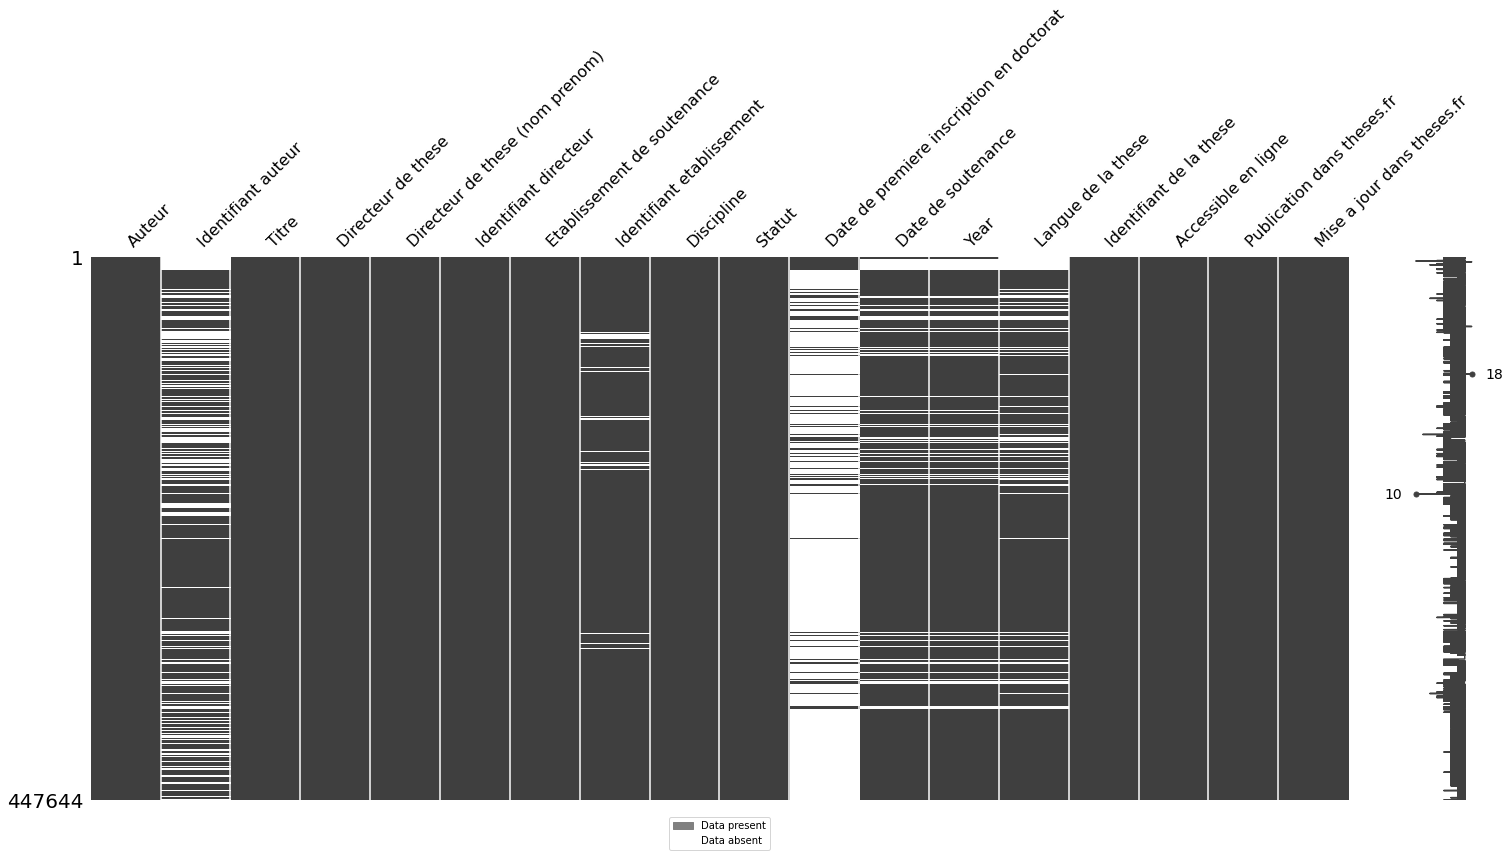

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(data)
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
#plt.legend(handles=[gray_patch, white_patch])
plt.legend(handles=[gray_patch, white_patch],loc="lower center", bbox_to_anchor=(0.5, -0.1))




soutenue    381315
enCours      66329
Name: Statut, dtype: int64
enCours    66329
Name: Statut, dtype: int64


<AxesSubplot:>

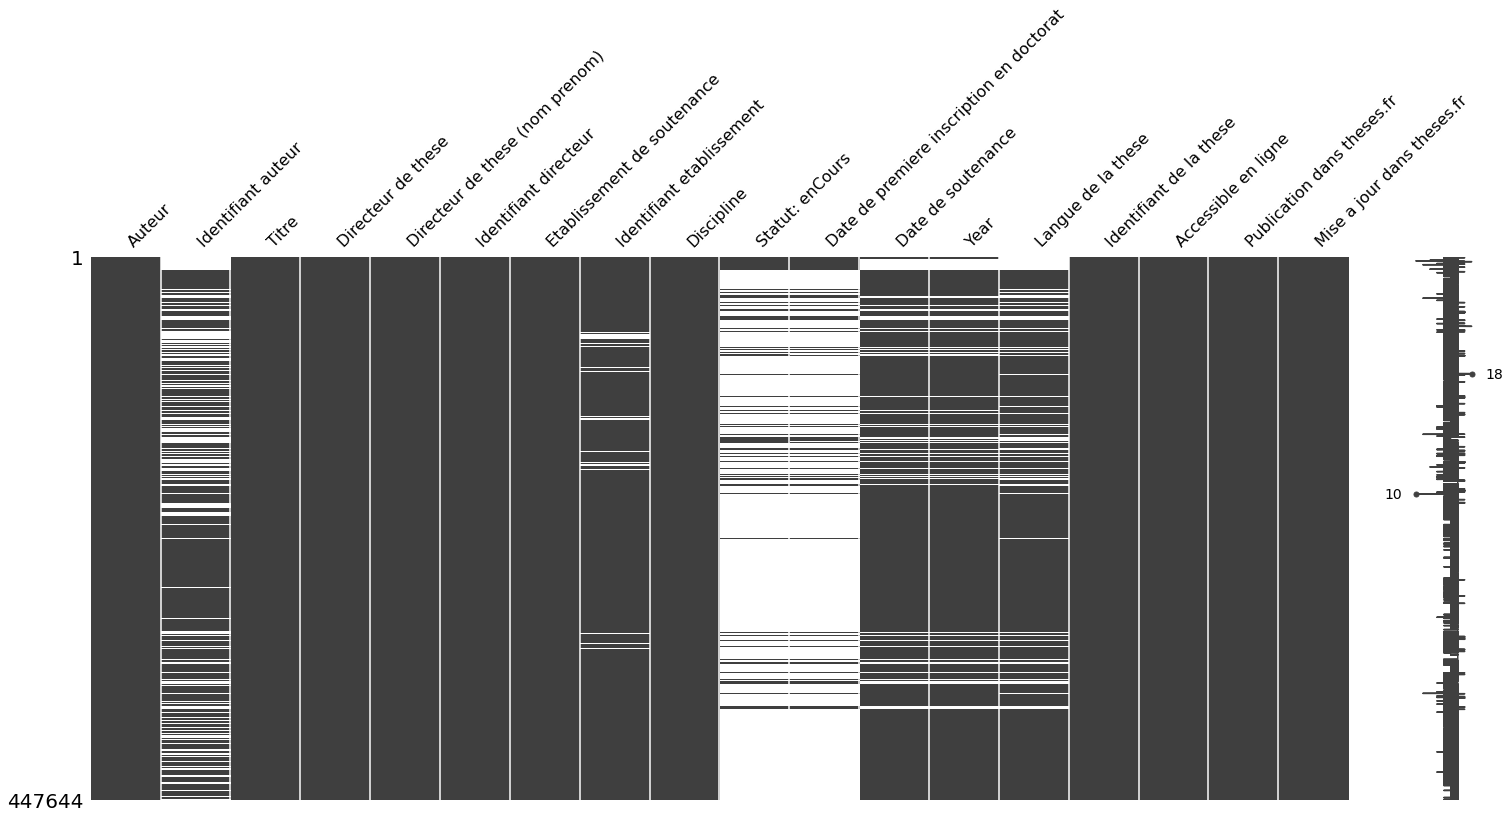

In [16]:
dataEncours=data.copy()
print( dataEncours['Statut'].value_counts() )
dataEncours.loc[(dataEncours.Statut == 'soutenue'),'Statut']=np.nan
print (dataEncours['Statut'].value_counts() )
dataEncours.rename(columns={'Statut': 'Statut: enCours'}, inplace=True)
msno.matrix(dataEncours)

soutenue    381315
enCours      66329
Name: Statut, dtype: int64
soutenue    381315
Name: Statut, dtype: int64


<AxesSubplot:>

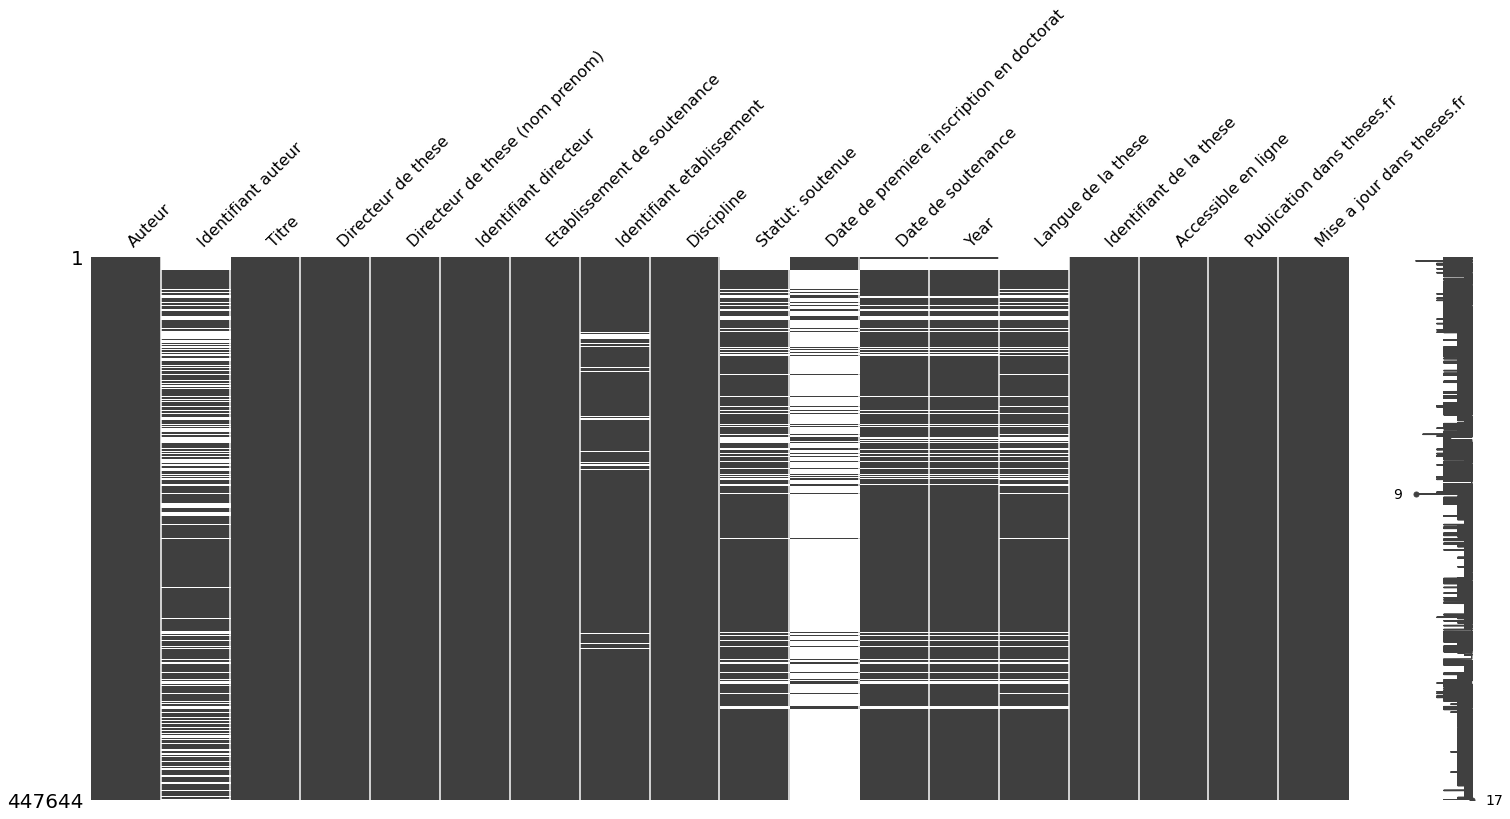

In [18]:
dataSoute=data.copy()
print( dataSoute['Statut'].value_counts() )
dataSoute.loc[(dataSoute.Statut == 'enCours'),'Statut']=np.nan
print (dataSoute['Statut'].value_counts() )
dataSoute.rename(columns={'Statut': 'Statut: soutenue'}, inplace=True)
msno.matrix(dataSoute)

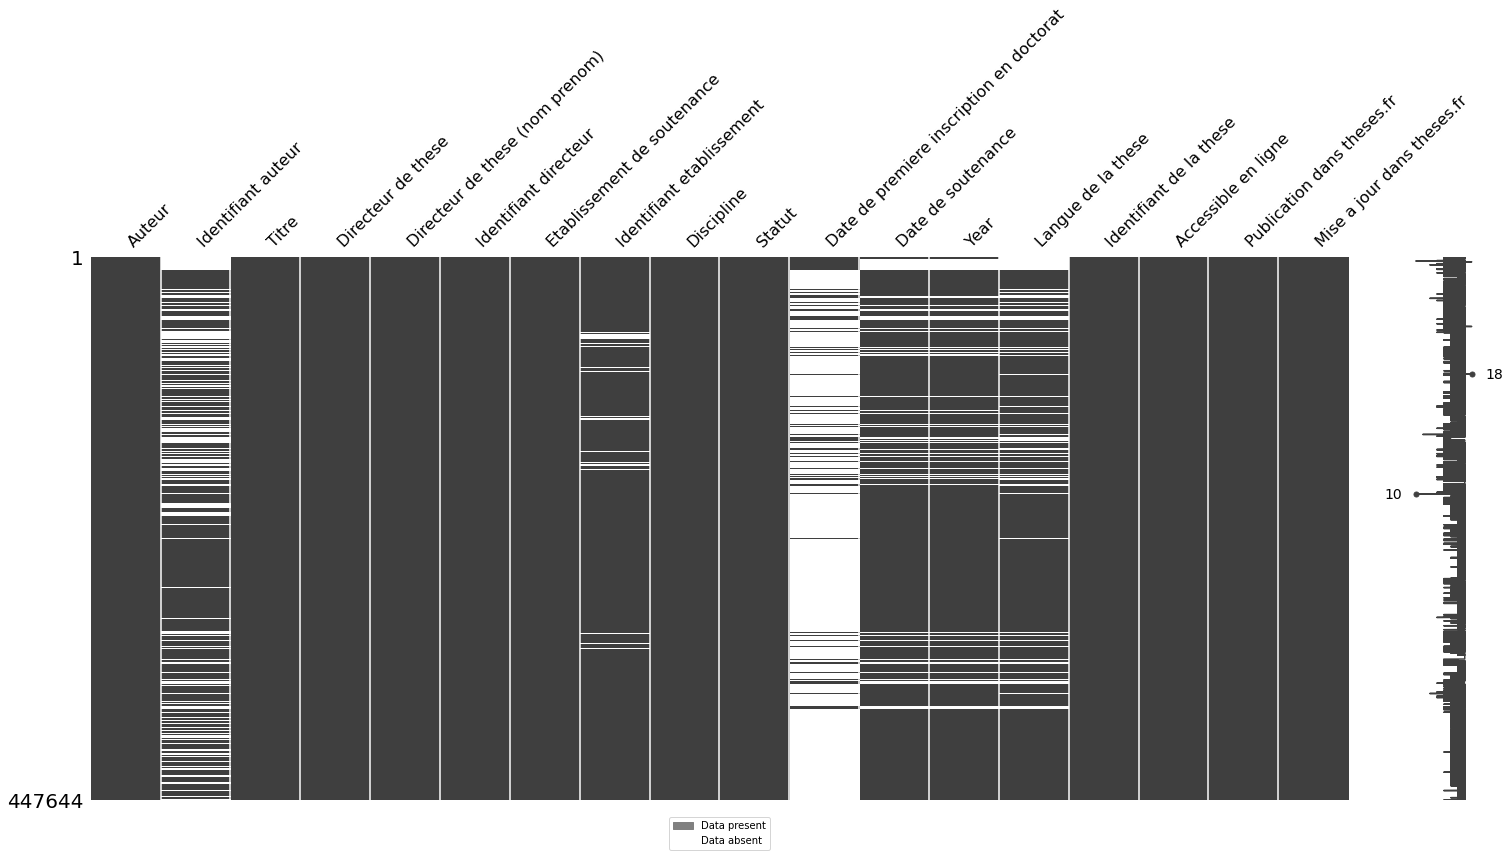

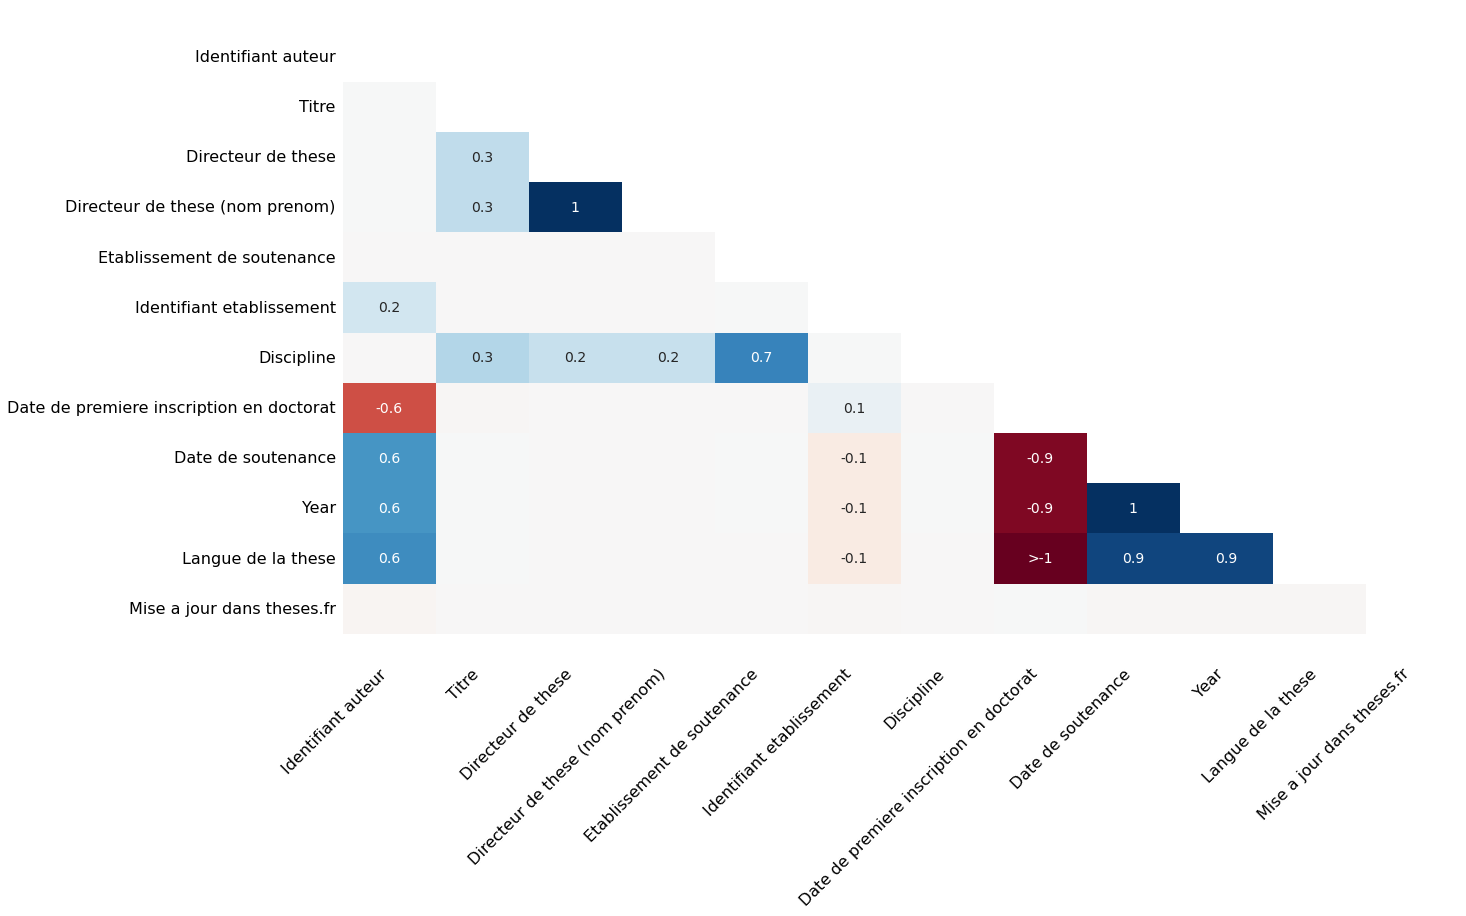

In [3]:


msno.heatmap(data)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()




In [29]:
print(CRED +'catégoriel de Statut_these '+ CEND)
print(Statut_these.describe())
correlation=pd.DataFrame([Statut_these,date_soutien,date_inscription]).transpose()
print(CRED +'détaillé en Statut_these,date_soutien,date_inscription '+ CEND)
print(correlation.shape)
print( correlation.head())
print( correlation.columns )
print(correlation.dtypes )
print(correlation.info() )

catégoriel de Statut_these 
count       447644
unique           2
top       soutenue
freq        381315
Name: Statut, dtype: object
détaillé en Statut_these,date_soutien,date_inscription 
(447644, 3)
     Statut Date de soutenance Date de premiere inscription en doctorat
0   enCours                NaN                                 30-09-11
1   enCours                NaN                                 01-10-12
2  soutenue           01-01-93                                      NaN
3   enCours                NaN                                 01-06-11
4   enCours                NaN                                 07-12-09
Index(['Statut', 'Date de soutenance',
       'Date de premiere inscription en doctorat'],
      dtype='object')
Statut                                      object
Date de soutenance                          object
Date de premiere inscription en doctorat    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data colum

***********Question 2. Comment trouve le correlation entre statut et les dates? par machine ou algorithme ?********


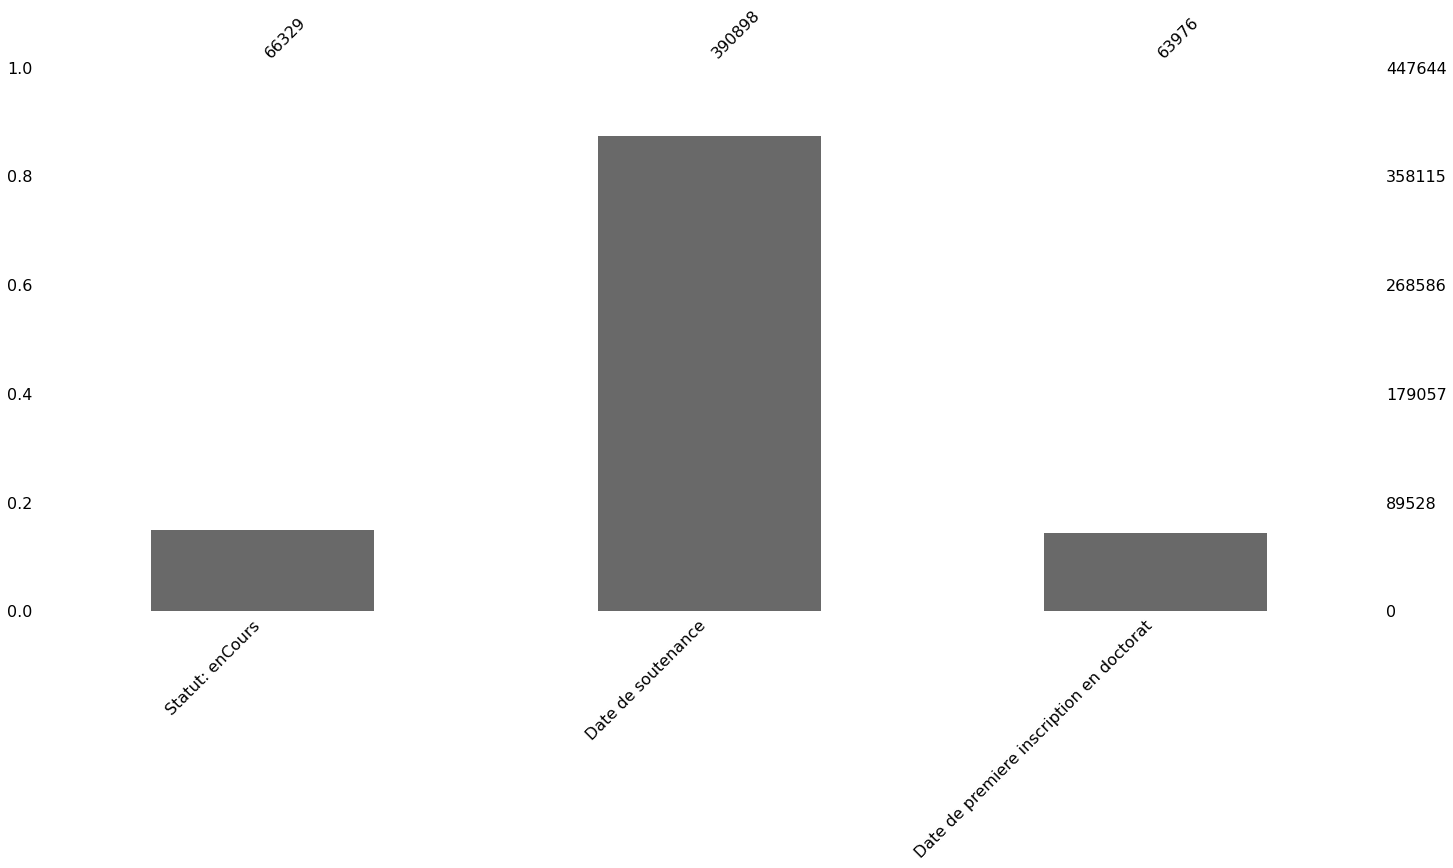

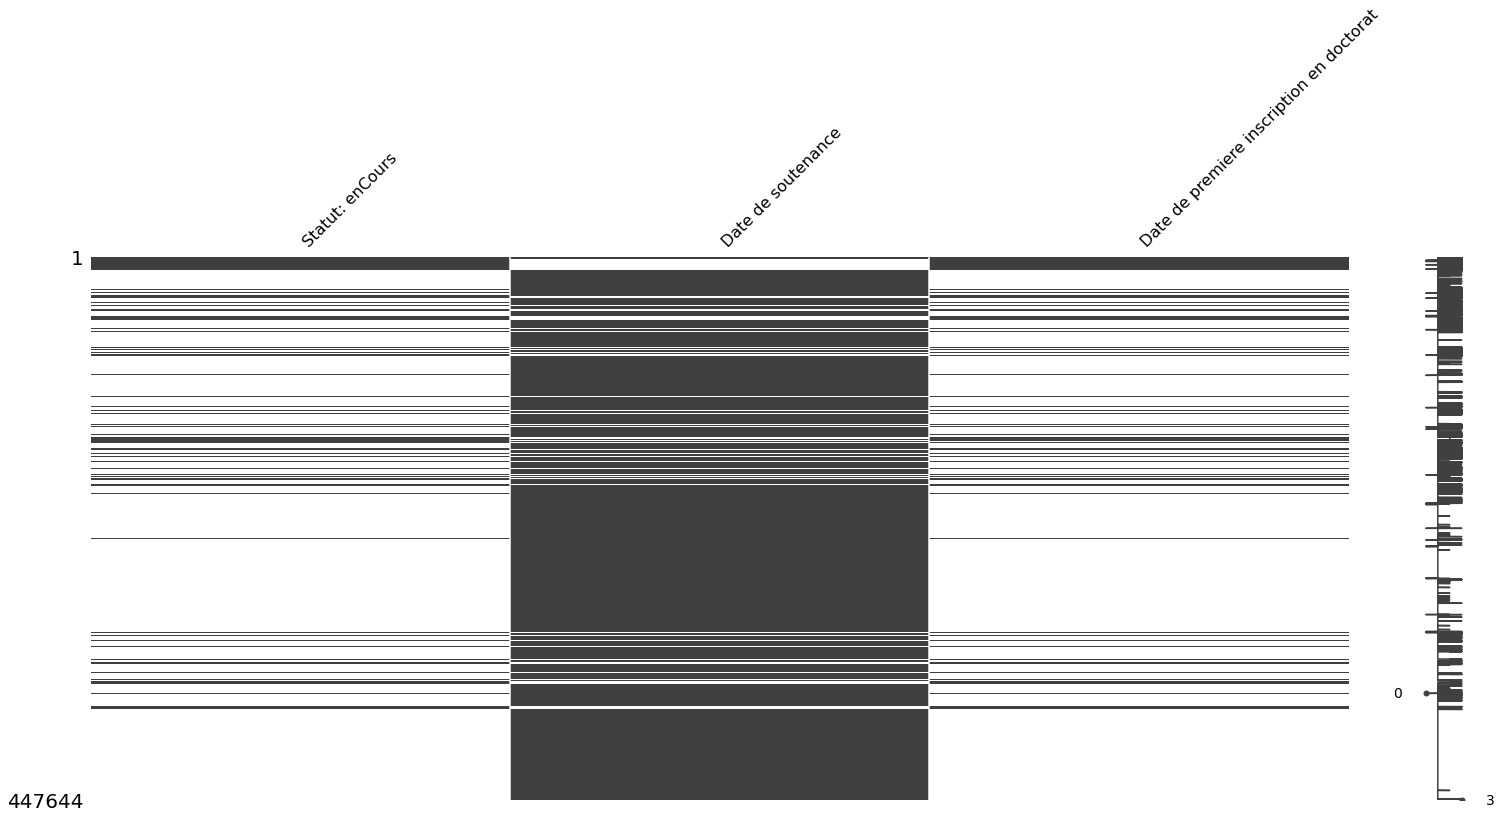

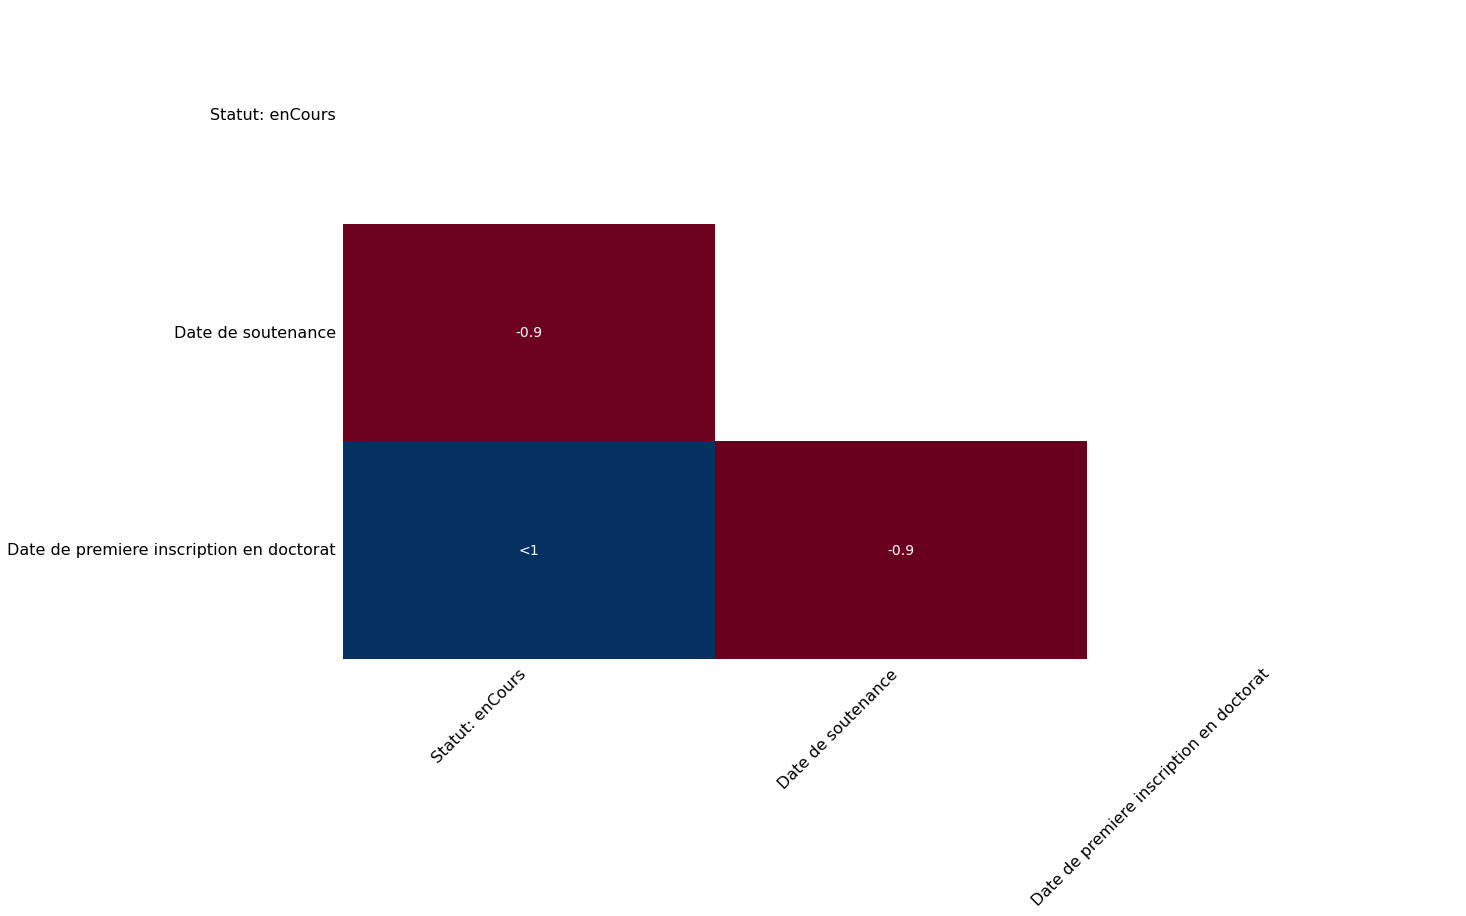

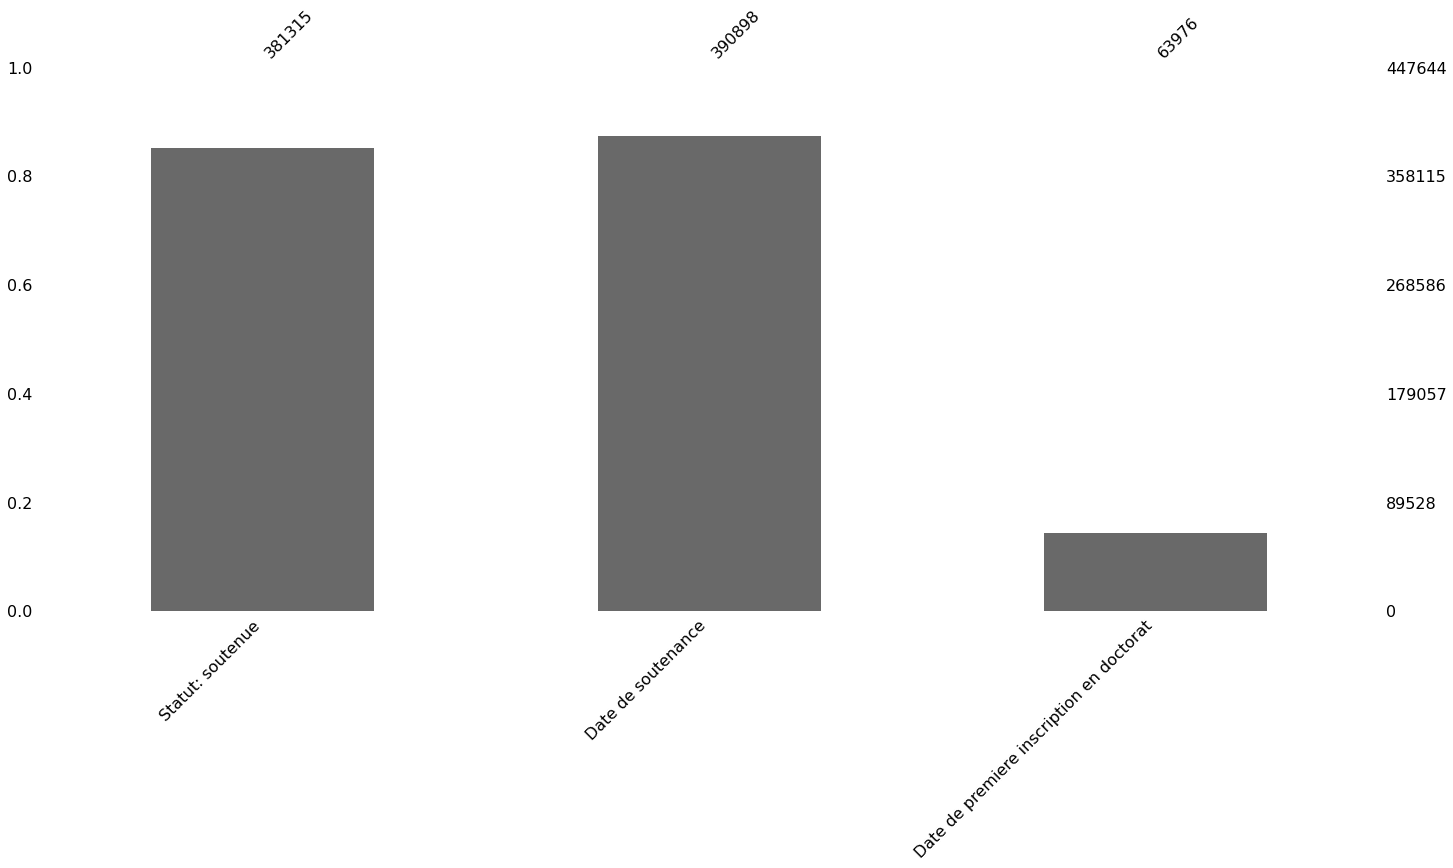

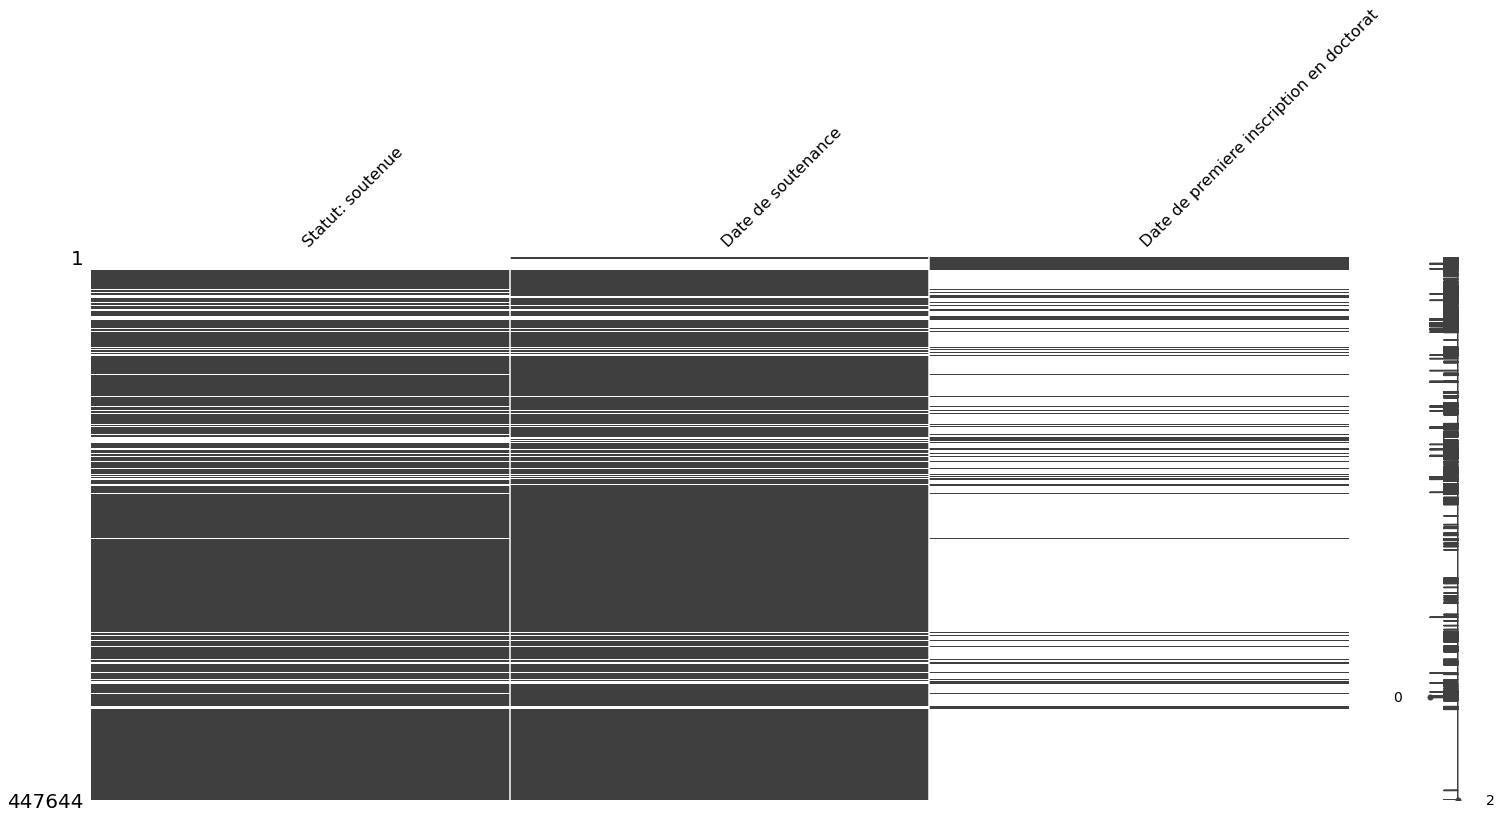

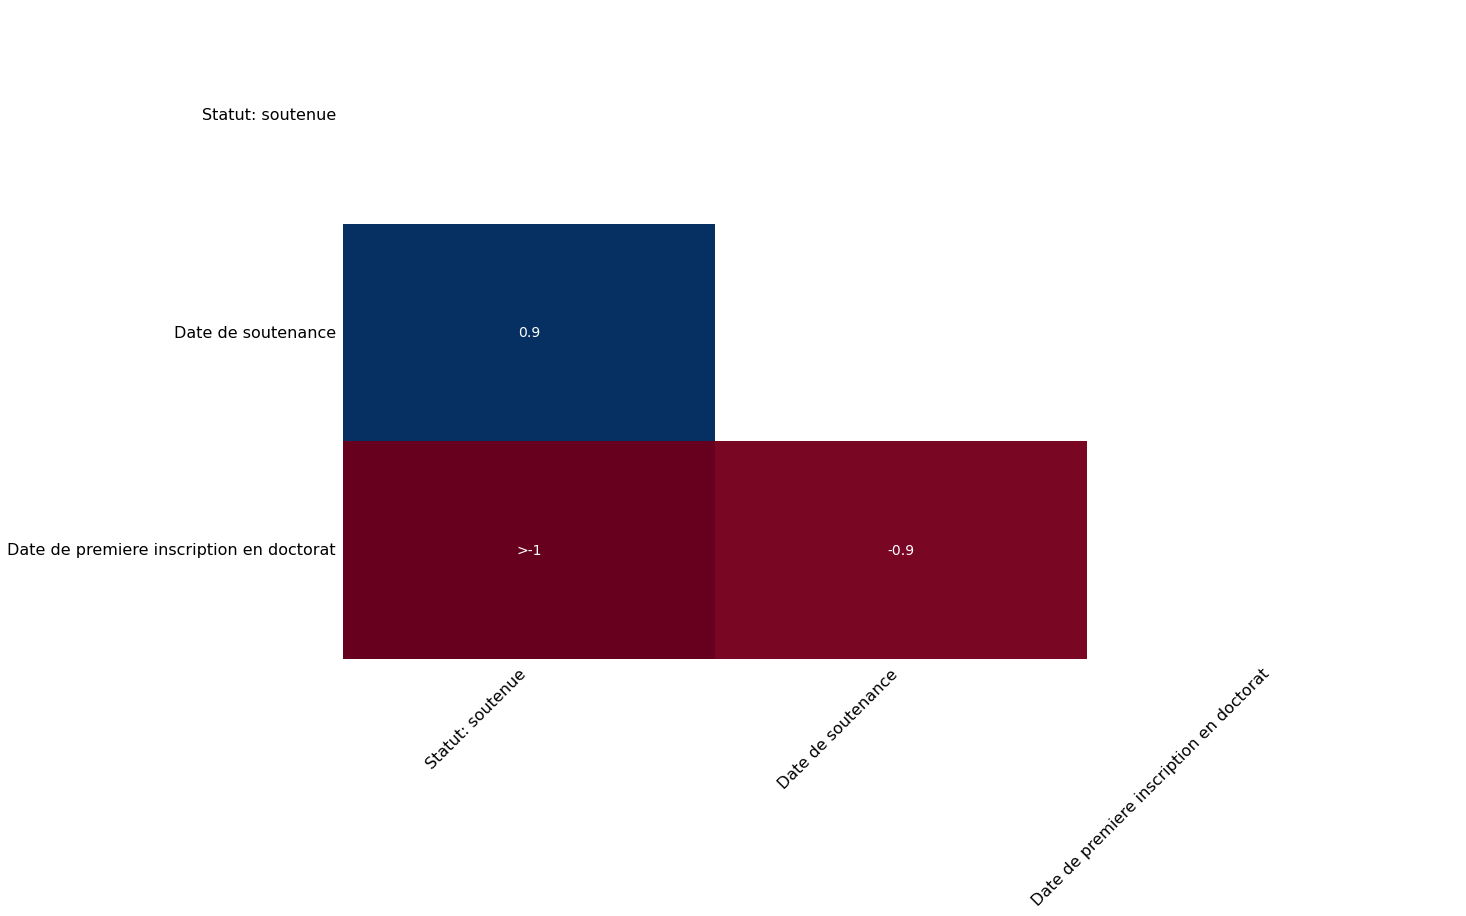

In [30]:
#nonarow_commun=correlation[  (~correlation['Date de soutenance'].isna()) & (~correlation['Date de premiere inscription en doctorat'].isna())  ] 
import seaborn as sns
    
correlation_copy1=correlation.copy()
correlation_copy1['Statut']=correlation_copy1['Statut'].replace( {'soutenue': np.nan })
correlation_new1=correlation_copy1.rename(columns={'Statut': 'Statut: enCours'})
msno.bar(correlation_new1)
msno.matrix(correlation_new1)
msno.heatmap(correlation_new1)
 

correlation_copy2=correlation.copy()
correlation_copy2['Statut']=correlation_copy2['Statut'].replace( {'enCours': np.nan })
correlation_new2=correlation_copy2.rename(columns={'Statut': 'Statut: soutenue'})
msno.bar(correlation_new2)
msno.matrix(correlation_new2)
msno.heatmap(correlation_new2)
print(grb + '***********Question 2. Comment trouve le correlation entre statut et les dates? par machine ou algorithme ?********' +  CEND)
